In [7]:
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import pandas as pd
import io
import requests
mpl.rcParams['figure.figsize'] = (10,5)
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['grid.color'] = 'b'
plt.style.use(['dark_background'])

In [2]:
def read_from_url(dataset : str) -> (pd.DataFrame):
    train_data = pd.read_csv(f'https://pages.mini.pw.edu.pl/~teisseyrep/TEACHING/AML/Project2/{dataset}_train.data', sep = ' ', header=None).iloc[:,:-1].values
    valid_data = pd.read_csv(f'https://pages.mini.pw.edu.pl/~teisseyrep/TEACHING/AML/Project2/{dataset}_valid.data', sep = ' ', header=None).iloc[:,:-1].values
    train_labels = pd.read_csv(f'https://pages.mini.pw.edu.pl/~teisseyrep/TEACHING/AML/Project2/{dataset}_train.labels', header=None).values.ravel()

    return train_data, train_labels, valid_data

In [3]:
X, labels, valid = read_from_url('artificial')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=42)

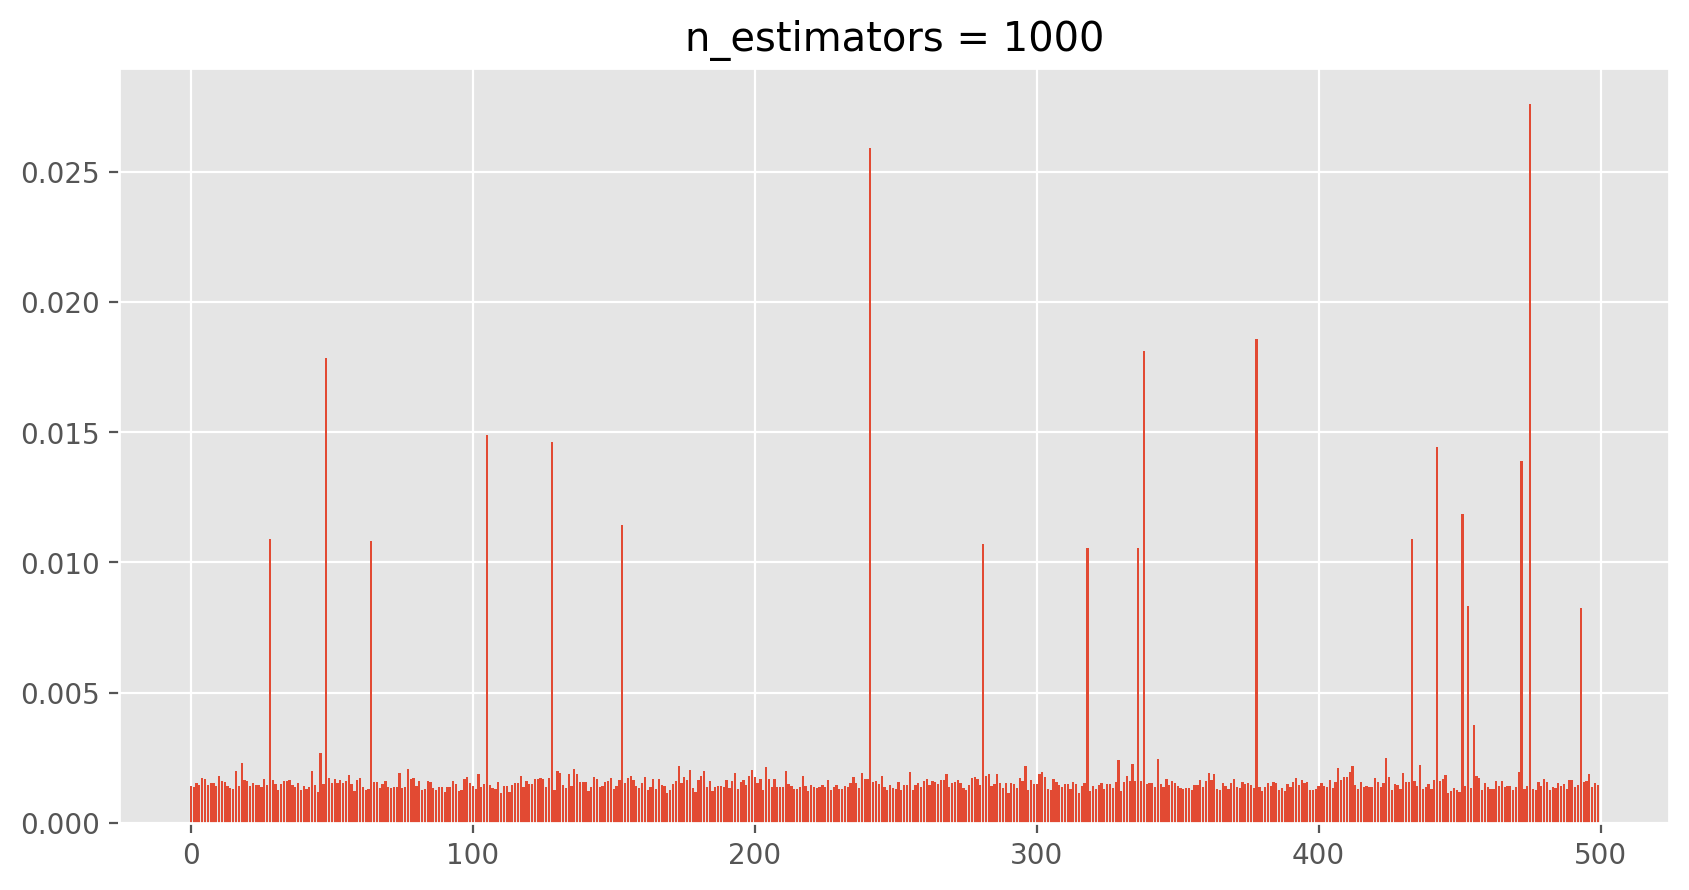

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=1000, criterion='gini', min_samples_split=10, max_features=100)
clf = clf.fit(X_train, y_train)

N = len(clf.feature_importances_)

fig, ax=plt.subplots()
plot = ax.bar(x=range(0,N),height=clf.feature_importances_)
ax.set_title('n_estimators = 1000')
plt.style.use(['ggplot'])

In [25]:
model = SelectFromModel(clf, prefit=True)
selected_features = model.transform(X)
selected_features.shape

(2000, 37)

In [26]:
(clf.predict(X_test) == y_test).mean()

0.7606060606060606

In [84]:
%%capture
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Gini Tree Classifier', fontsize = 16)
weight_plot = ax1.bar(x=range(0,N),height=clf.feature_importances_)
ax2.set_ylim([0,100])
ax2.set_xlim([0,1000])
accuracy_plot = ax2.plot([],[])

accuracies = []
def animate(i):
    y = labels
    clf = ExtraTreesClassifier(n_estimators=(i+1)*5, criterion='gini', min_samples_split=10, max_features=100)
    clf = clf.fit(X_train, y_train)
    accuracy = (clf.predict(X_test) == y_test).mean()
    accuracies.append(accuracy*100)

    for rect, weight in zip(weight_plot, clf.feature_importances_):
        rect.set_height(weight)
    ax1.set_title(f'n_estimators = {(i+1)*5}')
    x_vals = np.array(range(0, len(accuracies))) * 5
    ax2.plot(x_vals.tolist(),accuracies, color = 'r')
    ax2.set_title(f'accuracy = {accuracy*100}%')
        
anim = animation.FuncAnimation(fig,animate,frames=200,blit=False,repeat=False)
anim.save('ExtraTreesClassifier.mp4',writer=animation.FFMpegWriter(fps=50))